# Importing required packages, modules & libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, multilabel_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

# Loading Data

In [2]:
#loading and reading data file
df = pd.read_excel("trainDataset.xls")
#setting it to display all columns(features) of the dataset
pd.options.display.max_columns = None
#displaying first five rows of data
df.head()

,ID,pCR (outcome),RelapseFreeSurvival (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,TRG002174,1,144.0,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.68930,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.68930,0.670

# Exploring Dataset

In [3]:
#description of the dataset
print(df.describe())

       pCR (outcome)  RelapseFreeSurvival (outcome)         Age          ER  \
count     400.000000                     400.000000  400.000000  400.000000   
mean       12.727500                      56.159792   51.851171    0.540000   
std       111.104111                      26.763774   10.864462    0.499022   
min         0.000000                       5.000000   23.000000    0.000000   
25%         0.000000                      38.000000   44.616016    0.000000   
50%         0.000000                      55.041667   51.119781    1.000000   
75%         1.000000                      73.000000   60.000000    1.000000   
max       999.000000                     144.000000   79.603012    1.000000   

              PgR       HER2  TrippleNegative  ChemoGrade  Proliferation  \
count  400.000000  400.00000       400.000000  400.000000     400.000000   
mean     2.900000    2.81000         2.830000    9.880000       6.577500   
std     49.932235   49.93649        49.935558   86.092482   

In [4]:
#checking how many rows and columns in dataset
df.shape

(400, 120)

In [5]:
# dataset information
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 120 columns):
 #    Column                                              Non-Null Count  Dtype  
---   ------                                              --------------  -----  
 0    ID                                                  400 non-null    object 
 1    pCR (outcome)                                       400 non-null    int64  
 2    RelapseFreeSurvival (outcome)                       400 non-null    float64
 3    Age                                                 400 non-null    float64
 4    ER                                                  400 non-null    int64  
 5    PgR                                                 400 non-null    int64  
 6    HER2                                                400 non-null    int64  
 7    TrippleNegative                                     400 non-null    int64  
 8    ChemoGrade                                          400 non-null    

# Dropping unnecessary features/columns

In [6]:
#drop ID coloumn, because it doesn't affect the sickness
df=df.drop(['ID'],axis=1)
#drop RelapseFreeSurvival (outcome) because it is for regression task
df=df.drop(['RelapseFreeSurvival (outcome)'],axis=1)
df

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_VoxelVolume,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Mean,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance,original_glcm_Autocorrelation,original_glcm_ClusterProminence,original_glcm_ClusterShade,original_glcm_ClusterTendency,original_glcm_Contrast,original_glcm_Correlation,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,original_glcm_DifferenceVariance,original_glcm_Id,original_glcm_Idm,original_glcm_Idmn,original_glcm_Idn,original_glcm_Imc1,original_glcm_Imc2,original_glcm_InverseVariance,original_glcm_JointAverage,original_glcm_JointEnergy,original_glcm_JointEntropy,original_glcm_MCC,original_glcm_MaximumProbability,original_glcm_SumAverage,original_glcm_SumEntropy,original_glcm_SumSquares,original_gldm_DependenceEntropy,original_gldm_DependenceNonUniformity,original_gldm_DependenceNonUniformityNormalized,original_gldm_DependenceVariance,original_gldm_GrayLevelNonUniformity,original_gldm_GrayLevelVariance,original_gldm_HighGrayLevelEmphasis,original_gldm_LargeDependenceEmphasis,original_gldm_LargeDependenceHighGrayLevelEmphasis,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_glrlm_GrayLevelNonUniformity,original_glrlm_GrayLevelNonUniformityNormalized,original_glrlm_GrayLevelVariance,original_glrlm_HighGrayLevelRunEmphasis,original_glrlm_LongRunEmphasis,original_glrlm_LongRunHighGrayLevelEmphasis,original_glrlm_LongRunLowGrayLevelEmphasis,original_glrlm_LowGrayLevelRunEmphasis,original_glrlm_RunEntropy,original_glrlm_RunLengthNonUniformity,original_glrlm_RunLengthNonUniformityNormalized,original_glrlm_RunPercentage,original_glrlm_RunVariance,original_glrlm_ShortRunEmphasis,original_glrlm_ShortRunHighGrayLevelEmphasis,original_glrlm_ShortRunLowGrayLevelEmphasis,original_glszm_GrayLevelNonUniformity,original_glszm_GrayLevelNonUniformityNormalized,original_glszm_GrayLevelVariance,original_glszm_HighGrayLevelZoneEmphasis,original_glszm_LargeAreaEmphasis,original_glszm_LargeAreaHighGrayLevelEmphasis,original_glszm_LargeAreaLowGrayLevelEmphasis,original_glszm_LowGrayLevelZoneEmphasis,original_glszm_SizeZoneNonUniformity,original_glszm_SizeZoneNonUniformityNormalized,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,41.0,0,0,0,1,3,3,1,1,2,0.813912,0.724080,23.781937,32.844370,37.696154,38.626416,34.713110,39.572718,14209.458330,26.732440,0.771675,3676.500012,0.258736,14263,-0.163500,0.708860,2897.689300,0.738088,0.406537,4.594629,2.114799,0.278008,0.248168,0.217628,-1.251833,3.366632,0.174026,0.450734,0.386237,2897.689300,0.670258,0.141574,3.328814,0.725849,-0.425324,0.4387

# Checking Missing Values

In [7]:
#checking the entire dataset for null values
print("Number of null values in dataset: ", df.isnull().sum().sum()) 

Number of null values in dataset:  0


In [8]:
#checking for null value in the features one by one
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index + ":", row[0])

pCR (outcome): 0
Age: 0
ER: 0
PgR: 0
HER2: 0
TrippleNegative: 0
ChemoGrade: 0
Proliferation: 0
HistologyType: 0
LNStatus: 0
TumourStage: 0
original_shape_Elongation: 0
original_shape_Flatness: 0
original_shape_LeastAxisLength: 0
original_shape_MajorAxisLength: 0
original_shape_Maximum2DDiameterColumn: 0
original_shape_Maximum2DDiameterRow: 0
original_shape_Maximum2DDiameterSlice: 0
original_shape_Maximum3DDiameter: 0
original_shape_MeshVolume: 0
original_shape_MinorAxisLength: 0
original_shape_Sphericity: 0
original_shape_SurfaceArea: 0
original_shape_SurfaceVolumeRatio: 0
original_shape_VoxelVolume: 0
original_firstorder_10Percentile: 0
original_firstorder_90Percentile: 0
original_firstorder_Energy: 0
original_firstorder_Entropy: 0
original_firstorder_InterquartileRange: 0
original_firstorder_Kurtosis: 0
original_firstorder_Maximum: 0
original_firstorder_MeanAbsoluteDeviation: 0
original_firstorder_Mean: 0
original_firstorder_Median: 0
original_firstorder_Minimum: 0
original_firstorde

In [9]:
# making 999 as null value (missing value)
df[df==999] = np.nan

In [10]:
#checking the entire dataset for null values (999)
print("Number of null values in dataset: ", df.isnull().sum().sum())

Number of null values in dataset:  17


In [11]:
pd.options.display.max_rows = None
df.isnull().sum()

pCR (outcome)                                         5
Age                                                   0
ER                                                    0
PgR                                                   1
HER2                                                  1
TrippleNegative                                       1
ChemoGrade                                            3
Proliferation                                         2
HistologyType                                         3
LNStatus                                              1
TumourStage                                           0
original_shape_Elongation                             0
original_shape_Flatness                               0
original_shape_LeastAxisLength                        0
original_shape_MajorAxisLength                        0
original_shape_Maximum2DDiameterColumn                0
original_shape_Maximum2DDiameterRow                   0
original_shape_Maximum2DDiameterSlice           

# Handling missing values 

#### Remove missing values

In [12]:
# # drop all rows that have NaN values
df = df.dropna()
# Reset index after drop
df=df.dropna().reset_index(drop=True)
print(df)

     pCR (outcome)        Age  ER  PgR  HER2  TrippleNegative  ChemoGrade  \
0              1.0  41.000000   0  0.0   0.0              1.0         3.0   
1              0.0  39.000000   1  1.0   0.0              0.0         3.0   
2              1.0  31.000000   0  0.0   0.0              1.0         2.0   
3              0.0  35.000000   0  0.0   0.0              1.0         3.0   
4              0.0  61.000000   1  0.0   0.0              0.0         2.0   
5              0.0  49.000000   0  0.0   0.0              1.0         3.0   
6              0.0  56.000000   0  0.0   0.0              1.0         3.0   
7              0.0  41.000000   0  0.0   0.0              1.0         3.0   
8              0.0  46.000000   0  0.0   0.0              1.0         2.0   
9              0.0  50.000000   0  0.0   1.0              0.0         2.0   
10             1.0  43.000000   1  1.0   1.0              0.0         3.0   
11             0.0  46.000000   1  1.0   0.0              0.0         2.0   

# Split dataset

In [13]:
#setting the dependent and independent variables
X = df[df.columns[1:]]
y  = df['pCR (outcome)']

In [14]:
features = df.drop(['pCR (outcome)'], axis=1)
target = df['pCR (outcome)']

# split ratio of 80:20. The 20% testing data set is represented by the 0.2 at the end.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((312, 117), (78, 117))

# Feature Selection

[0.01112691 0.02628424 0.01487255 0.02957475 0.00836391 0.00988992
 0.01297785 0.00499944 0.01455749 0.00984256 0.00889066 0.01131281
 0.00729524 0.0091036  0.0087307  0.00890145 0.01002893 0.00804104
 0.00690587 0.00800241 0.00945571 0.00703767 0.00908748 0.00747304
 0.00860822 0.0119086  0.00681228 0.00662145 0.01079931 0.00914301
 0.01304744 0.00973383 0.00866209 0.00843277 0.01047807 0.0096662
 0.00867339 0.00938795 0.01000398 0.0071693  0.00609509 0.01086068
 0.00568227 0.00707107 0.00742667 0.0063969  0.00705295 0.00864996
 0.00586488 0.00794433 0.00583459 0.0066554  0.00712077 0.0064898
 0.00759558 0.00924025 0.00691428 0.00752201 0.00657568 0.00597778
 0.00767632 0.00770449 0.00615099 0.00791019 0.00691353 0.00657413
 0.00888661 0.00659228 0.00764519 0.00872075 0.00779054 0.00618283
 0.00674814 0.00932322 0.00880147 0.0075775  0.0058885  0.00792404
 0.00729788 0.00742204 0.0082069  0.0080887  0.00689776 0.0082133
 0.00731939 0.00784321 0.00788766 0.0058702  0.007042   0.0077104

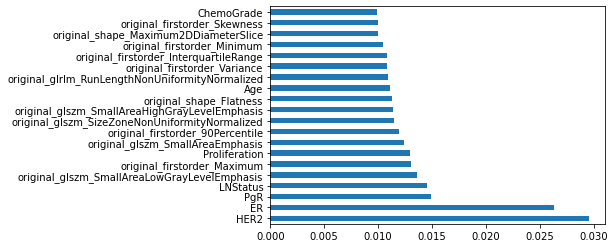

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_feat_importance = feat_importances.nlargest(20).plot(kind='barh')
plt.show(top_feat_importance)

In [16]:
df.drop(df.columns.difference(['original_firstorder_Variance','original_glrlm_RunEntropy','original_firstorder_Range','original_firstorder_RootMeanSquared','original_glszm_LowGrayLevelNonUniformityNormalized','ChemoGrade','original_firstorder_Maximum','TumourStage','original_firstorder_90Percentile','original_glszm_SmallAreaEmphasis','original_firstorder_MeanAbsoluteDeviation','original_glszm_SmallAreaLowGrayLevelEmphasis','original_shape_Flatness','original_glszm_SmallAreaHighGrayLevelEmphasis','LNStatus','PgR','Proliferation','ER','HER2']), 1, inplace=True)
df.head()

C:\Users\peiying\AppData\Local\Temp\ipykernel_16220\1311747614.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['original_firstorder_Variance','original_glrlm_RunEntropy','original_firstorder_Range','original_firstorder_RootMeanSquared','original_glszm_LowGrayLevelNonUniformityNormalized','ChemoGrade','original_firstorder_Maximum','TumourStage','original_firstorder_90Percentile','original_glszm_SmallAreaEmphasis','original_firstorder_MeanAbsoluteDeviation','original_glszm_SmallAreaLowGrayLevelEmphasis','original_shape_Flatness','original_glszm_SmallAreaHighGrayLevelEmphasis','LNStatus','PgR','Proliferation','ER','HER2']), 1, inplace=True)


,ER,PgR,HER2,ChemoGrade,Proliferation,LNStatus,TumourStage,original_shape_Flatness,original_firstorder_90Percentile,original_firstorder_Maximum,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Range,original_firstorder_RootMeanSquared,original_firstorder_Variance,original_glrlm_RunEntropy,original_glszm_SmallAreaEmphasis,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis
0,0,0.0,0.0,3.0,3.0,1.0,2,0.724080,0.708860,2.114799,0.278008,3.366632,0.450734,0.141574,3.865811,0.403535,0.517172,0.375126
1,1,1.0,0.0,3.0,3.0,1.0,2,0.476173,2.322627,3.857952,0.499454,4.964442,1.698168,0.441115,4.255471,0.444391,0.444391,0.444391
2,0,0.0,0.0,2.0,1.0,0.0,2,0.594470,1.961740,3.841710,0.400199,4.867321,1.343236,0.316651,4.232295,0.534549,0.534549,0.534549
3,0,0.0,0.0,3.0,3.0,1.0,3,0.501228,2.164869,3.030400,0.442713,3.881506,1.645732,0.306963,4.412648,0.506185,0.506185,0.506185
4,1,0.0,0.0,2.0,1.0,0.0,2,0.750267,1.832410,2.315364,0.447799,3.181566,1.328508,0.301317,4.140589,0.462282,0.462282,0.462282


# Normalize data

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_st = scaler.fit_transform(X)
print(X_train)

[[-0.53753011 -1.0662956  -0.8285448  ... -0.87637265 -0.69377939
   0.05341028]
 [ 1.42418425 -1.0662956  -0.8285448  ... -0.41322333 -0.52124625
  -0.25223671]
 [-0.74894922  0.93782625  1.20693534 ...  0.85997328  0.54744625
  -0.24271258]
 ...
 [-0.76193655  0.93782625  1.20693534 ... -0.16751776 -0.42741781
  -0.22041218]
 [ 0.24699329  0.93782625  1.20693534 ... -0.50133982 -0.58945934
  -0.22664275]
 [-1.19526449 -1.0662956  -0.8285448  ...  0.76923937  0.3883357
  -0.12558821]]


## Support Vector Machine

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        62
         1.0       1.00      0.06      0.12        16

    accuracy                           0.81        78
   macro avg       0.90      0.53      0.50        78
weighted avg       0.85      0.81      0.73        78

Accuracy Score: 0.8076923076923077


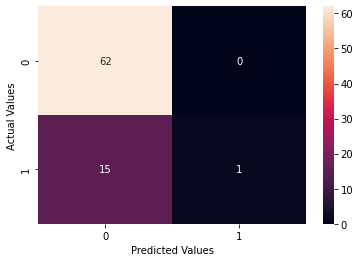

In [18]:
svc_model = SVC(C=1, kernel='rbf')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print('Classification Report:\n', classification_report(y_test, y_pred_svc, zero_division = 0))
print('Accuracy Score:', accuracy_score(y_test, y_pred_svc))

score = round(accuracy_score(y_test, y_pred_svc), 6)
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### Hyperparameter Tuning for Support Vector Machine

In [19]:
svc_param_grid = {'C':[0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.001, 0.01, 0.1, 1, 10]}

svc_cv = KFold(n_splits=5)
svc_grid = GridSearchCV(SVC(), svc_param_grid, cv=svc_cv, scoring='accuracy')
svc_grid.fit(X_train, y_train)

print('SVM best Params:', svc_grid.best_params_)
print('SVM best Score:', svc_grid.best_score_)

SVM best Params: {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
SVM best Score: 0.7499231950844854


Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      1.00      0.89        62
         1.0       1.00      0.06      0.12        16

    accuracy                           0.81        78
   macro avg       0.90      0.53      0.50        78
weighted avg       0.85      0.81      0.73        78

Accuracy Score: 0.8076923076923077


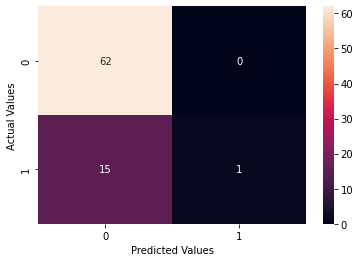

[0.75641026 0.75641026 0.75641026 0.75641026 0.76923077]


In [21]:
svc_model = SVC(C = 0.01, gamma = 0.001, kernel='rbf')
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)

print('Classification Report:\n', classification_report(y_test, y_pred_svc, zero_division = 0))
print('Accuracy Score:', accuracy_score(y_test, y_pred_svc))

cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot = True, fmt = ".0f")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#K-fold cross validation
n_folds = 5
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
cv_error = (cross_val_score(clf_cv, X, y, cv=n_folds))
print(cv_error)

# PCR Prediction

In [22]:
# Read the excel file into a DataFrame
df_test = pd.read_excel('testDatasetExample.xls', sheet_name='Sheet1')
patient_prediction= df_test[df_test.columns[1:]]
var_ID = df_test['ID']

In [23]:
# Make predictions on new data using the trained model

# example of making a single class prediction
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X_train, y_train = make_blobs(n_samples=3, centers=2, n_features=117, random_state=42)
# fit final model
model = SVC()
model.fit(X_train, y_train)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=117, random_state=42)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
 print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
predictions = np.where(ynew > 0.5, 1, 0)

X=[ -2.2018981    9.82714825   5.26950768   1.14417467  -7.43980823
  -6.13281599  -8.22795749   7.30262132   2.13962762   5.43911645
 -10.1798815    9.94529442   6.44666016  -5.97089899  -5.2647238
  -5.50649345  -3.1016455    1.80060744  -1.34009579  -3.49346422
   1.92679114  -6.88595643  -4.28725008  -2.57576717  -0.28344329
   4.88529854  -3.91413708  -0.72132861   0.63410276  -7.91288087
   2.94255973  -5.96539771  -8.07062263   8.96546397   8.41538629
   6.24375152  -4.58488633  -7.07143799   3.53760315  -2.02244732
  -7.88062114   0.31646966  -9.87595413   7.36418765  -4.58071316
   3.49541226  -4.27272165  -0.06967788   1.16625552  -7.75099523
   7.98422878   4.78421225   8.57653168   8.20745457   3.43335579
   9.29514432  -8.39008849  -6.09935896 -10.09798359  -3.51190652
  -2.51511285  -4.2503008    5.74751924  -2.34558695  -2.84857089
   0.74516151  -6.77980378   6.73408361  -8.9102076    9.96183121
   5.45748779  -5.92801027 -10.66256744   6.33373874   4.63514517
   6.0312

In [24]:
print(predictions)

[0 0 1]


In [25]:
# Creating an CSV file to write PCR outcome
import csv
with open('FinalTestPCR.csv', 'w', newline='') as file:
    writer=csv.writer(file)
    writer.writerow(['patient ID', 'PCR Prediction'])
    for prediction in range(len(var_ID)):
        writer.writerow([var_ID[prediction],predictions[prediction]])